In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [2]:
data = pd.read_csv('../input/kmeans-clustering-data/data.txt', header=None, delimiter='\t')
data.columns = ['A','B']
data.head()

,A,B
0,1.658985,4.285136
1,-3.453687,3.424321
2,4.838138,1.151539
3,-5.379713,-3.362104
4,0.972564,2.924086


In [3]:
# Checking for Null values
data.isna().sum().to_frame('Null Values')

,Null Values
A,0
B,0


In [4]:
# Structure of Data
data.shape

(80, 2)

In [5]:
# Statistics of data
data.describe()

,A,B
count,80.000000,80.000000
mean,-0.103613,0.083090
std,3.037579,3.052991
min,-5.379713,-4.232586
25%,-2.836842,-3.012599
50%,0.029122,0.955898
75%,2.635250,2.940614
max,4.838138,5.190400


In [6]:
data.corr()

,A,B
A,1.000000,0.112569
B,0.112569,1.000000


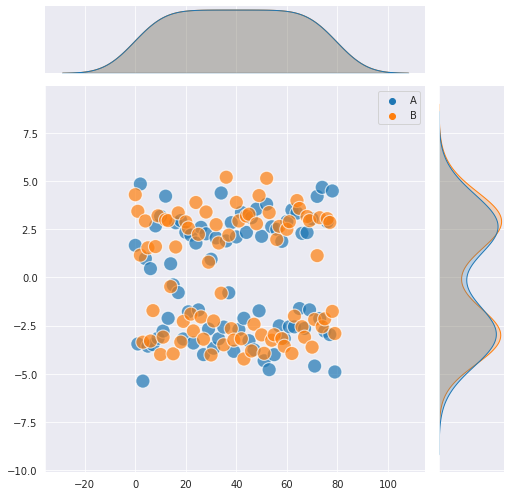

In [7]:
# Plotting distribution of data
sns.jointplot(data=data, s=200, alpha=0.7, height=7)
plt.show()

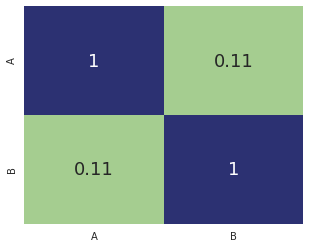

In [8]:
# Plotting correlation between variables
plt.figure(figsize=(5,4))
sns.heatmap(data.corr(), annot=True, cbar=False, cmap='crest', annot_kws={'size':18})
plt.show()

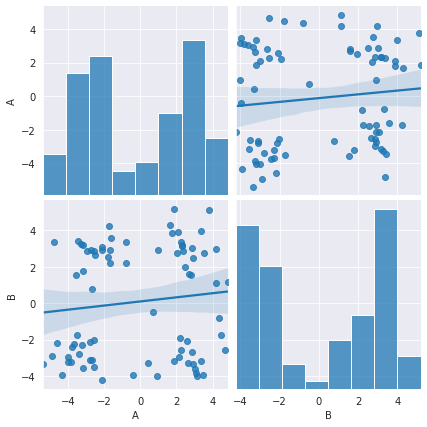

In [9]:
sns.pairplot(data, kind='reg', height=3)
plt.show()

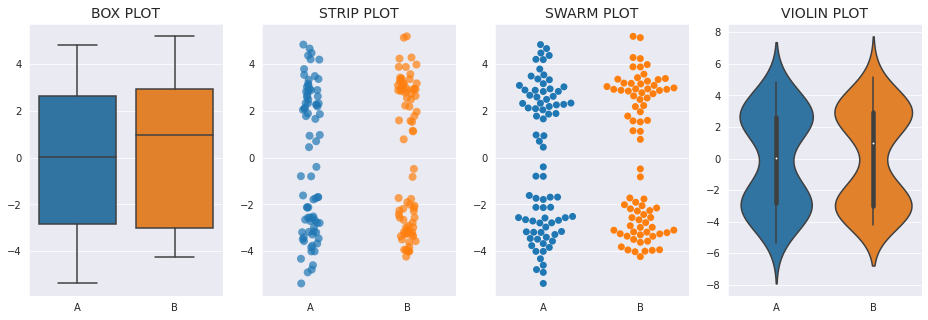

In [10]:
fig, ax = plt.subplots(1, 4, figsize=(16,5))
ax[0].set_title('BOX PLOT', fontsize=14)
ax[1].set_title('STRIP PLOT', fontsize=14)
ax[2].set_title('SWARM PLOT', fontsize=14)
ax[3].set_title('VIOLIN PLOT', fontsize=14)
sns.boxplot(data=data, ax=ax[0])
sns.stripplot(data=data, s=8, alpha=0.7, ax=ax[1])
sns.swarmplot(data=data, s=7, ax=ax[2])
sns.violinplot(data=data, ax=ax[3])
plt.show()

# K-Means Clustering

In [11]:
# Importing Libraries
from sklearn.cluster import KMeans
from sklearn import metrics

In [12]:
# Preparing data
X = data.values

### Finding Optimal number of Clusters

In [13]:
wcss = []
for i in range(1,11):
    km_clust = KMeans(n_clusters=i, init='k-means++', random_state=0)
    km_clust.fit(X)
    wcss.append(km_clust.inertia_)
    print(f'WCSS {i}: {km_clust.inertia_}')

WCSS 1: 1465.263601582203
WCSS 2: 788.2388891532481
WCSS 3: 416.62104619903937
WCSS 4: 151.0891182897385
WCSS 5: 128.67901758235806
WCSS 6: 107.39144605676016
WCSS 7: 96.68592882304914
WCSS 8: 84.33859734819022
WCSS 9: 75.46852168026126
WCSS 10: 64.58345406727352


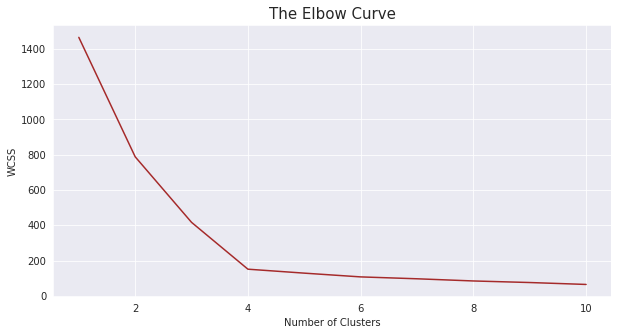

In [14]:
# Plotting Elbow Curve
plt.figure(figsize=(10,5))
plt.plot(range(1,11), wcss, color='brown')
plt.title('The Elbow Curve', fontsize=15)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

* Number of Clusters: 4

In [15]:
# Making Predictions
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
y_means = kmeans.fit_predict(X)
y_means

array([1, 2, 1, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 3, 1, 2, 3, 0, 1, 2,
       3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0,
       1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2,
       3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0], dtype=int32)

In [16]:
# Cluster Centers
kmeans.cluster_centers_

array([[-3.53973889, -2.89384326],
       [ 2.73184457,  3.01548295],
       [-2.46154315,  2.78737555],
       [ 2.54140545, -2.87212285]])

## Visualization

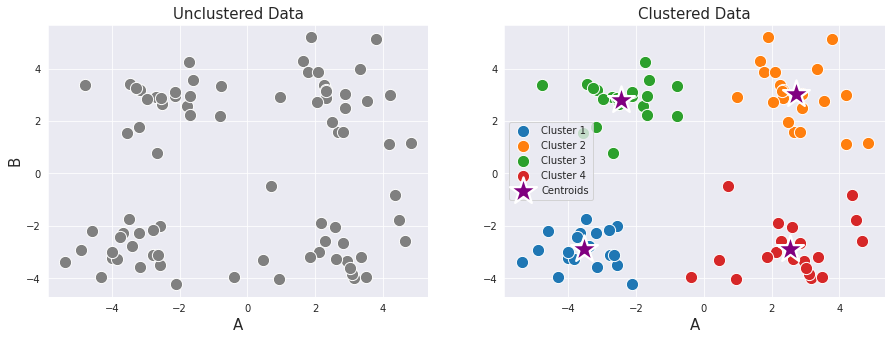

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].set_title('Unclustered Data', fontsize=15)
ax[0].set_xlabel('A', fontsize=15)
ax[0].set_ylabel('B', fontsize=15)
sns.scatterplot(data.iloc[:,0], data.iloc[:,-1], ax=ax[0], s=150, color='gray')
ax[1].set_title('Clustered Data', fontsize=15)
ax[1].set_xlabel('A', fontsize=15)
for i in range(0,4):
    sns.scatterplot(X[y_means == i, 0], X[y_means == i, 1], s=150, label='Cluster '+str(i+1), ax=ax[1])
sns.scatterplot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=800, marker='*', 
                color='purple', label='Centroids', ax=ax[1])
fig.show()

## Evaluating the Model

In [18]:
# Evaluating the Model
print(f'Silhouette Score: {np.round(metrics.silhouette_score(X, y_means), decimals=3)}')

Silhouette Score: 0.656


## Thank You!